# Preprocessing

In [276]:
import pandas as pd

In [277]:
data = pd.read_csv('GlobalTemperatures.csv', parse_dates=['dt'])
data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
data.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


#### Wykluczenie rekordow o dużym błędzie pomiaru

In [279]:
counter = 0
for index, row in data.iterrows():
    if row['LandMaxTemperatureUncertainty'] > 2.5 or row['LandMaxTemperatureUncertainty'] > 2.5 \
    or row['LandAndOceanAverageTemperatureUncertainty'] > 2.5 or row['LandAverageTemperatureUncertainty'] > 2.5 :
        counter += 1
        data.drop(index, inplace = True)
        
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2833 entries, 3 to 3191
Data columns (total 9 columns):
dt                                           2833 non-null datetime64[ns]
LandAverageTemperature                       2821 non-null float64
LandAverageTemperatureUncertainty            2821 non-null float64
LandMaxTemperature                           1962 non-null float64
LandMaxTemperatureUncertainty                1962 non-null float64
LandMinTemperature                           1962 non-null float64
LandMinTemperatureUncertainty                1962 non-null float64
LandAndOceanAverageTemperature               1962 non-null float64
LandAndOceanAverageTemperatureUncertainty    1962 non-null float64
dtypes: datetime64[ns](1), float64(8)
memory usage: 221.3 KB


### Wypełnienie brakujących danych medianą

In [280]:
dt = data.iloc[:,0]

In [281]:
data = data.iloc[:,1:].apply(lambda x: x.fillna(x.median()), axis = 0)
data.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3,8.490,2.451,14.7895,0.249,2.99,0.274,15.2665,0.122
4,11.573,2.072,14.7895,0.249,2.99,0.274,15.2665,0.122
5,12.937,1.724,14.7895,0.249,2.99,0.274,15.2665,0.122
6,15.868,1.911,14.7895,0.249,2.99,0.274,15.2665,0.122
7,14.750,2.231,14.7895,0.249,2.99,0.274,15.2665,0.122


#### Sprawdzenie efektów wypełnienia brakujących danych

- wypłenienie brakujących danych przebiegło efektywnie 
- nastąpiły zmiany w wartościach opisu statystycznego danych
- nastąpiły zmiany w histogramach

In [282]:
data.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000
mean,8.662052,0.643962,14.511776,0.381343,2.843579,0.370517,15.237842,0.124533
std,4.251492,0.659267,3.587700,0.414635,3.452621,0.352305,1.055910,0.058227
min,-1.385000,0.034000,5.900000,0.044000,-5.345000,0.045000,12.475000,0.042000
25%,4.630000,0.161000,11.670000,0.187000,0.361000,0.213000,14.475000,0.082000
50%,9.006000,0.321000,14.789500,0.249000,2.990000,0.274000,15.266500,0.122000
75%,12.811000,1.026000,17.266000,0.334000,5.384000,0.340000,15.971000,0.134000
max,16.391000,2.498000,21.320000,2.496000,9.715000,3.428000,17.611000,0.457000


In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2833 entries, 3 to 3191
Data columns (total 8 columns):
LandAverageTemperature                       2833 non-null float64
LandAverageTemperatureUncertainty            2833 non-null float64
LandMaxTemperature                           2833 non-null float64
LandMaxTemperatureUncertainty                2833 non-null float64
LandMinTemperature                           2833 non-null float64
LandMinTemperatureUncertainty                2833 non-null float64
LandAndOceanAverageTemperature               2833 non-null float64
LandAndOceanAverageTemperatureUncertainty    2833 non-null float64
dtypes: float64(8)
memory usage: 199.2 KB


In [286]:
data.isna().sum()

LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

### Transformacja dwóch cech do dobowej amplitudy

In [287]:
data.sort_values(by=['LandMaxTemperature'])

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1716,0.500,0.488,5.900,0.799,-5.345,0.480,12.702,0.186
1620,1.003,0.664,6.421,0.664,-4.621,0.698,12.889,0.215
1223,3.140,0.982,6.436,1.949,-3.242,2.843,13.638,0.339
1500,1.533,0.672,6.679,1.047,-4.717,1.524,13.027,0.246
1656,1.708,0.375,6.686,0.579,-4.299,0.531,13.132,0.148
...,...,...,...,...,...,...,...,...
3102,15.174,0.072,21.006,0.138,9.407,0.160,17.449,0.054
3114,15.231,0.148,21.085,0.100,9.456,0.130,17.578,0.067
3090,15.230,0.115,21.108,0.116,9.482,0.166,17.485,0.061
3030,15.354,0.077,21.199,0.075,9.409,0.096,17.487,0.062


In [288]:
amplitude = [x - y for x, y in zip(data['LandMaxTemperature'], data['LandMinTemperature'])]

### Kodowanie 

W naszym przypadku nie ma danych kategorycznych, dlatego nie ma potrzeby stosowania kodowania ich na dane numeryczne.

### Normalizacja 

Ze względu na to, że wartości cech (z wykluczeniem daty pomiaru) sięgają skali ujemnej, odpowiednim zabiegiem dla naszego zestawu danych będzie normalizacja do przedziału od -1 do 1 celem ujednolicenia wszystkich atrybutów.

In [289]:
data = data.apply(lambda x: 2 * (x - x.min()) / (x.max() - x.min()) - 1, axis = 0)
data.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3,0.111049,0.961851,0.152983,-0.83279,0.106906,-0.864617,0.087033,-0.614458
4,0.457921,0.654221,0.152983,-0.83279,0.106906,-0.864617,0.087033,-0.614458
5,0.611386,0.371753,0.152983,-0.83279,0.106906,-0.864617,0.087033,-0.614458
6,0.941157,0.523539,0.152983,-0.83279,0.106906,-0.864617,0.087033,-0.614458
7,0.815369,0.783279,0.152983,-0.83279,0.106906,-0.864617,0.087033,-0.614458


In [290]:
data.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000
mean,0.130406,-0.504901,0.116962,-0.724842,0.087461,-0.807557,0.075873,-0.602252
std,0.478341,0.535119,0.465331,0.338202,0.458515,0.208280,0.411180,0.280613
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.323245,-0.896916,-0.251621,-0.883361,-0.242231,-0.900680,-0.221184,-0.807229
50%,0.169104,-0.767045,0.152983,-0.832790,0.106906,-0.864617,0.087033,-0.614458
75%,0.597210,-0.194805,0.474189,-0.763458,0.424834,-0.825599,0.361371,-0.556627
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Standaryzacja 

In [291]:
data = data.apply(lambda x: (x - x.mean()) / x.std(), axis = 0)
data.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3,-0.040469,2.740982,0.07741,-0.31918,0.042409,-0.27396,0.027141,-0.043496
4,0.684689,2.166101,0.07741,-0.31918,0.042409,-0.27396,0.027141,-0.043496
5,1.005517,1.638241,0.07741,-0.31918,0.042409,-0.27396,0.027141,-0.043496
6,1.694922,1.921890,0.07741,-0.31918,0.042409,-0.27396,0.027141,-0.043496
7,1.431956,2.407278,0.07741,-0.31918,0.042409,-0.27396,0.027141,-0.043496


In [292]:
data.insert(0, "dt", dt, True) 

%store data
data.head()

Stored 'data' (DataFrame)


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3,1750-04-01,-0.040469,2.740982,0.07741,-0.31918,0.042409,-0.27396,0.027141,-0.043496
4,1750-05-01,0.684689,2.166101,0.07741,-0.31918,0.042409,-0.27396,0.027141,-0.043496
5,1750-06-01,1.005517,1.638241,0.07741,-0.31918,0.042409,-0.27396,0.027141,-0.043496
6,1750-07-01,1.694922,1.921890,0.07741,-0.31918,0.042409,-0.27396,0.027141,-0.043496
7,1750-08-01,1.431956,2.407278,0.07741,-0.31918,0.042409,-0.27396,0.027141,-0.043496


## Analiza danych po wstępnym przetworzeniu danych

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bff8710>,
      dtype=object)

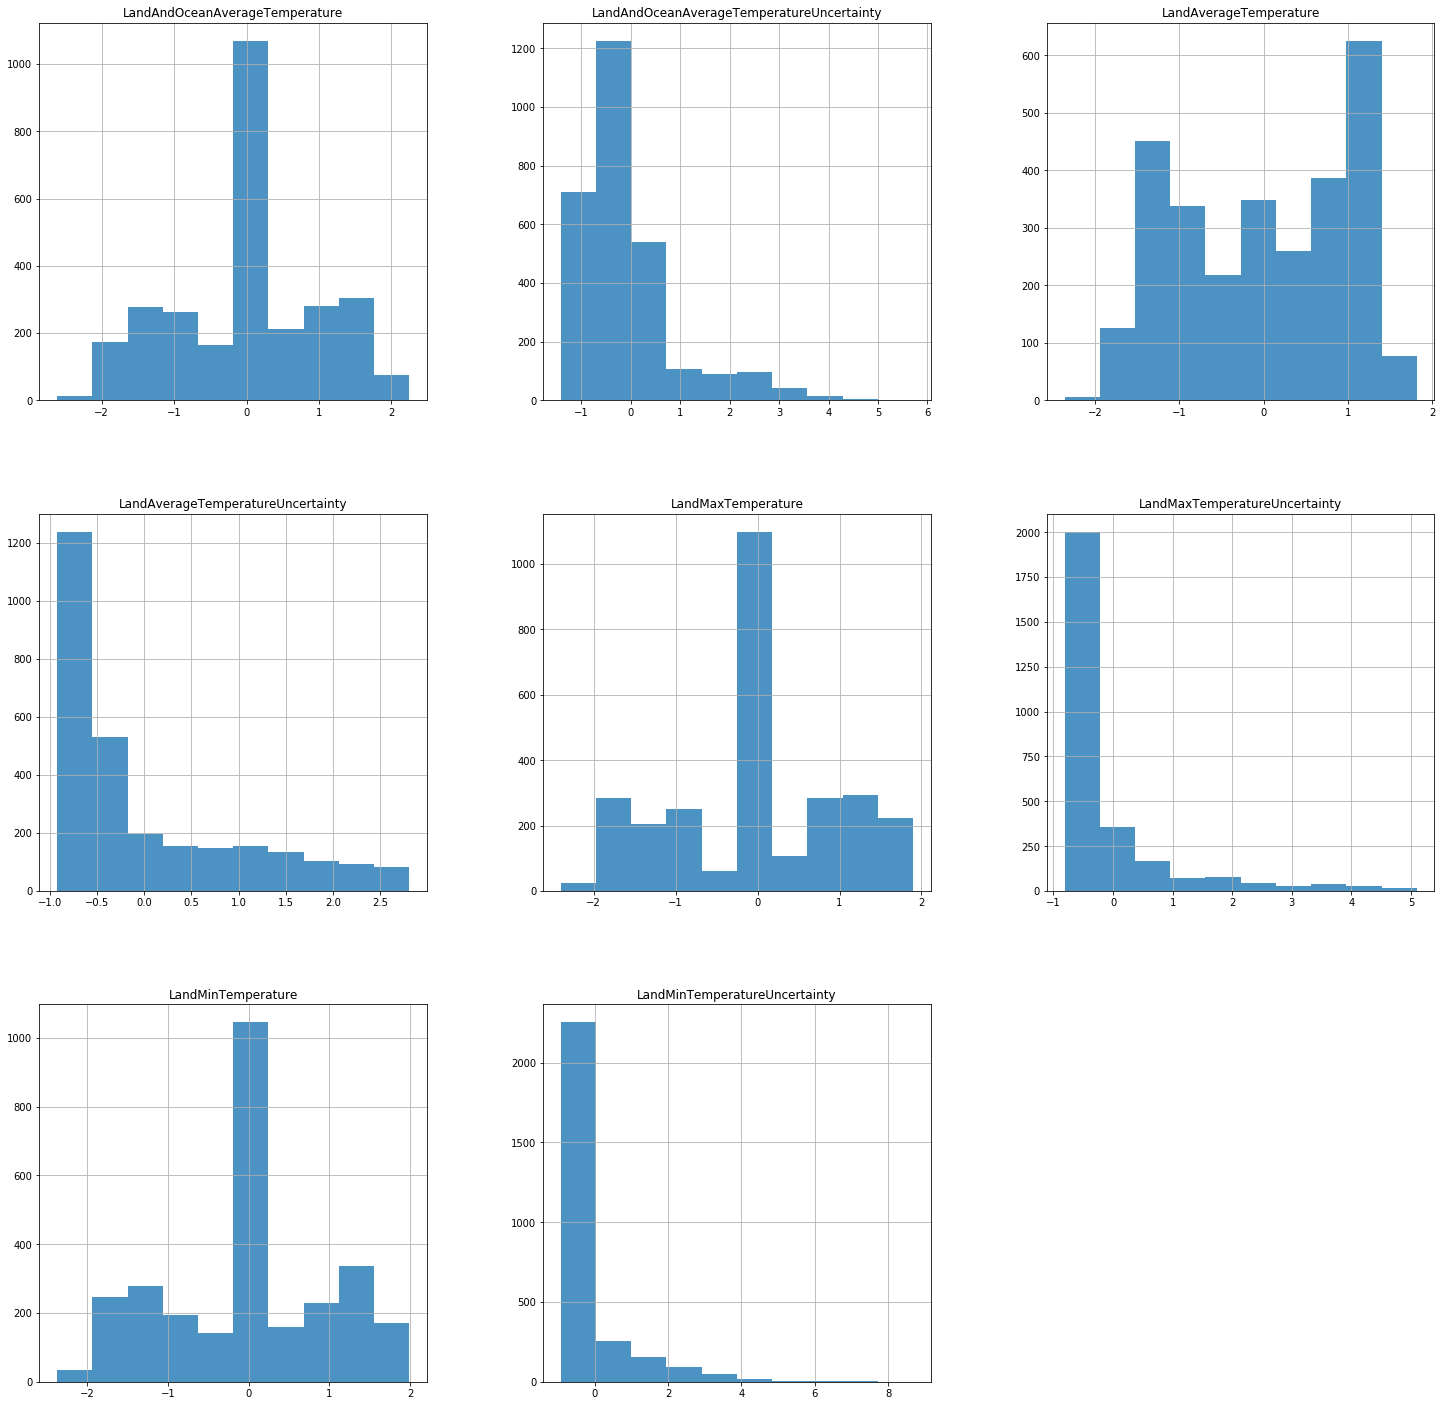

In [293]:
data.hist(figsize = (25, 25), alpha = 0.8)

In [294]:
# pip install ipynb
from ipynb.fs.full.I_Analysis import makeThreePlot

In [295]:
tempByYear = data.groupby(data.dt.dt.year).mean()

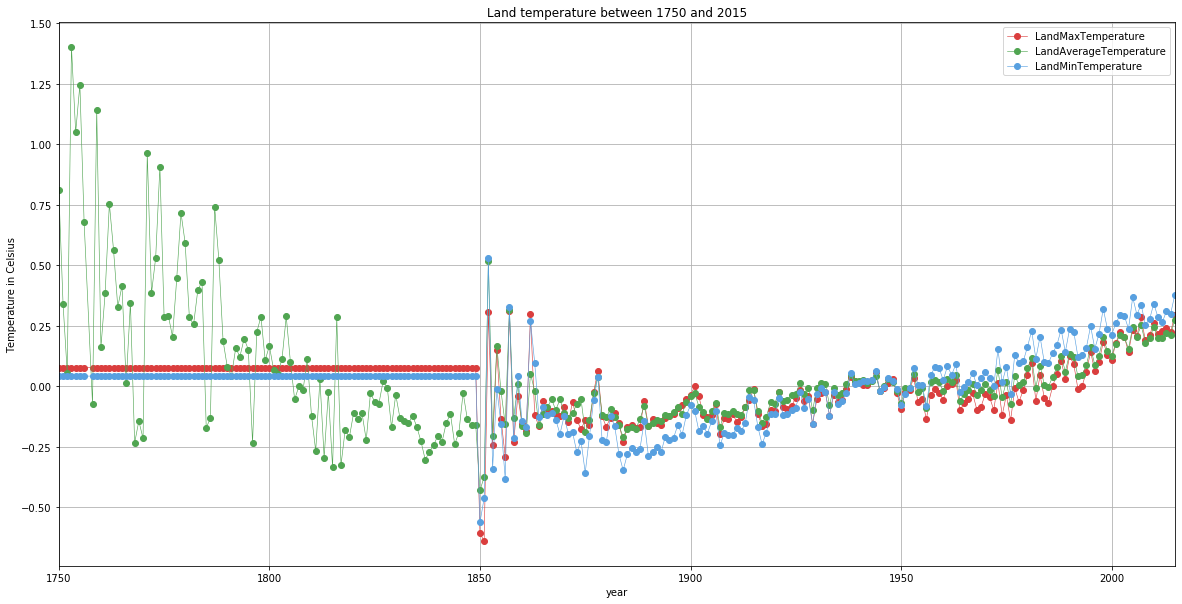

In [296]:
makeThreePlot(tempByYear, 'Land temperature between 1750 and 2015', 'year')

In [297]:
tempByMonth = data.groupby(data.dt.dt.month).mean()

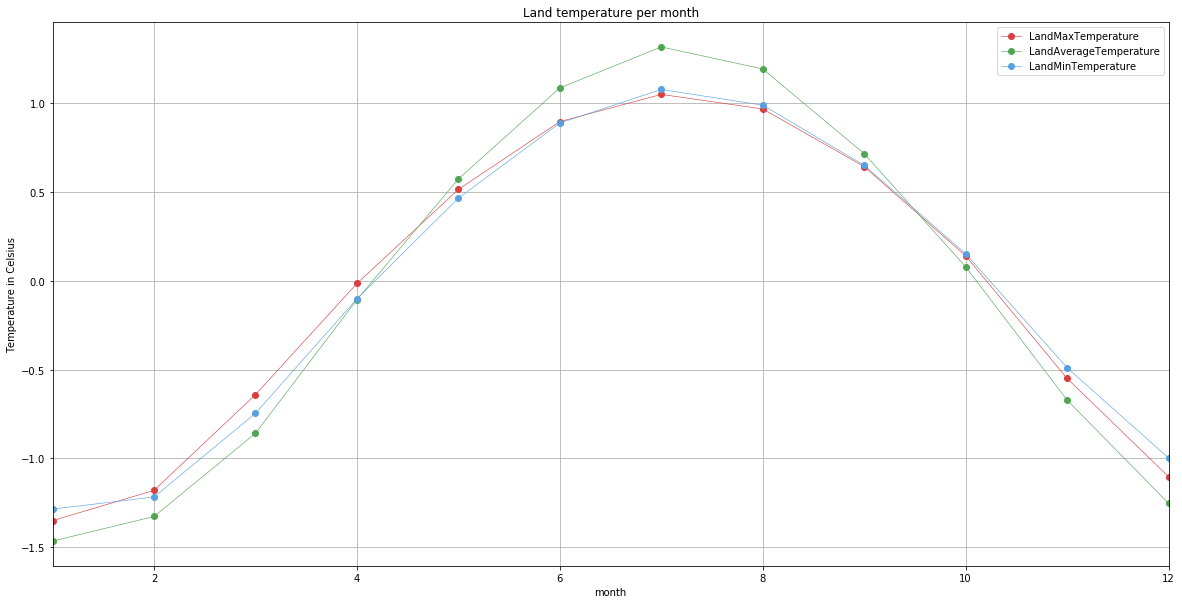

In [298]:
makeThreePlot(tempByMonth, 'Land temperature per month', 'month')